In [50]:
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [51]:
turbines1=pd.read_csv("gas_turbines.csv")
x=turbines1.drop("TEY", axis=1)
y=turbines1["TEY"]


In [52]:
x.shape

(15039, 10)

In [53]:
y=np.reshape(y.values, (-1,1))

In [54]:
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()

In [55]:
x_transform=scaler_x.fit_transform(x)
y_transform=scaler_y.fit_transform(y)

In [56]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                132       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_transform, y_transform)

In [58]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [59]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
181/181 [==============================] - 1s 3ms/step - loss: 0.0368 - mse: 0.0368 - mae: 0.1360 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0565
Epoch 2/150
181/181 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0285 - val_loss: 8.2836e-04 - val_mse: 8.2836e-04 - val_mae: 0.0210
Epoch 3/150
181/181 [==============================] - 0s 2ms/step - loss: 6.1631e-04 - mse: 6.1631e-04 - mae: 0.0179 - val_loss: 4.6780e-04 - val_mse: 4.6780e-04 - val_mae: 0.0149
Epoch 4/150
181/181 [==============================] - 0s 2ms/step - loss: 3.6003e-04 - mse: 3.6003e-04 - mae: 0.0132 - val_loss: 3.1014e-04 - val_mse: 3.1014e-04 - val_mae: 0.0118
Epoch 5/150
181/181 [==============================] - 0s 2ms/step - loss: 2.3119e-04 - mse: 2.3119e-04 - mae: 0.0105 - val_loss: 2.2905e-04 - val_mse: 2.2905e-04 - val_mae: 0.0103
Epoch 6/150
181/181 [==============================] - 0s 2ms/step - loss: 1.7814e-04 - mse: 1.7814e-04 - mae: 0.0094 -

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


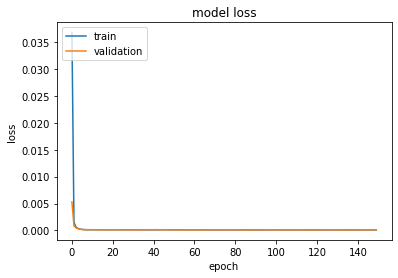

In [60]:
import matplotlib.pyplot as plt
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [61]:
model.evaluate(X_test,y_test)

118/118 [==============================] - 0s 933us/step - loss: 1.3359e-04 - mse: 1.3359e-04 - mae: 0.0084


[0.00013359339209273458, 0.00013359339209273458, 0.00844163354486227]

In [62]:
model.predict(X_test)

118/118 [==============================] - 0s 823us/step


array([[0.46040145],
       [0.45563033],
       [0.14079446],
       ...,
       [0.82582873],
       [0.16990861],
       [0.8499154 ]], dtype=float32)

In [63]:
y_test

array([[0.45069855],
       [0.46359484],
       [0.14199355],
       ...,
       [0.80924234],
       [0.16120365],
       [0.84403546]])

In [68]:
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse',metrics=['mse','mae'])
    return model

In [69]:
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

In [70]:
grid_result.cv_results_

{'mean_fit_time': array([70.48530345, 64.20399709, 64.54676604]),
 'std_fit_time': array([0.96143595, 0.49262867, 1.56721565]),
 'mean_score_time': array([0.27004385, 0.24041238, 0.23948674]),
 'std_score_time': array([0.02498537, 0.00620384, 0.00491757]),
 'param_optimizer': masked_array(data=['SGD', 'RMSprop', 'Adagrad'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'optimizer': 'SGD'},
  {'optimizer': 'RMSprop'},
  {'optimizer': 'Adagrad'}],
 'split0_test_score': array([-2.06601282e-04, -8.05375093e-05, -1.08054403e-04]),
 'split1_test_score': array([-8.58424319e-05, -1.16778276e-04, -8.02037539e-05]),
 'split2_test_score': array([-8.94554105e-05, -7.68557802e-05, -7.63372445e-05]),
 'split3_test_score': array([-0.00018488, -0.00014443, -0.00013005]),
 'split4_test_score': array([-1.69184073e-04, -9.50282993e-05, -8.46659241e-05]),
 'mean_test_score': array([-1.47192064e-04, -1.02725947e-04, -9.58619101e-05]),
 'std_test_

In [71]:
grid_result.best_score_

-9.586191008565947e-05

In [72]:
grid_result.best_params_

{'optimizer': 'Adagrad'}

In [73]:
grid_result.predict(X_test)

array([0.45059818, 0.4491989 , 0.14133051, ..., 0.81675255, 0.15900016,
       0.84108925], dtype=float32)

In [74]:
y_test

array([[0.45069855],
       [0.46359484],
       [0.14199355],
       ...,
       [0.80924234],
       [0.16120365],
       [0.84403546]])